In [1]:
#!pip install keras

In [2]:
#!!gsutil cp gs://dhodun1-ml/dogs-cats/train.zip .

In [3]:
!ls

cats_and_dogs_small_1.h5      Keras Ch 5 Dogs Cats.ipynb
cats_and_dogs_small_2.h5      libcudnn6_6.0.21-1+cuda8.0_amd64.deb
cuda			      libcudnn7_7.0.5.15-1+cuda8.0_amd64.deb
cudnn-8.0-linux-x64-v6.0.tgz  train
cudnn-8.0-linux-x64-v7.tgz    train.zip
data


In [4]:
#!unzip train.zip

In [5]:
!pwd

/home/dhodun


In [6]:
! ls test1

ls: cannot access 'test1': No such file or directory


In [7]:
import os, shutil

original_data_dir = '/home/dhodun/train'

base_dir = '/home/dhodun/data'
#os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

In [8]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    


In [9]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))

('total training cat images:', 1000)
('total validation cat images:', 500)
('total test cat images:', 500)


In [11]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

('total training dog images:', 1000)
('total validation dog images:', 500)
('total test dog images:', 500)


## Prepare Convnet

In [12]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [13]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

### Preprocess images

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
for data_batch, labels_batch in train_generator:
    print('data_batch_shape:', data_batch.shape)
    print('labels_batch_shape:', labels_batch.shape)
    break

('data_batch_shape:', (20, 150, 150, 3))
('labels_batch_shape:', (20,))


In [16]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

# save model
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 8s 83ms/step - loss: 0.6915 - acc: 0.5355 - val_loss: 0.6800 - val_acc: 0.5060
Epoch 2/30
100/100 [==============================] - 7s 74ms/step - loss: 0.6613 - acc: 0.5955 - val_loss: 0.6479 - val_acc: 0.6230
Epoch 3/30
100/100 [==============================] - 7s 68ms/step - loss: 0.6206 - acc: 0.6525 - val_loss: 0.6218 - val_acc: 0.6410
Epoch 4/30
100/100 [==============================] - 7s 68ms/step - loss: 0.5806 - acc: 0.7035 - val_loss: 0.5985 - val_acc: 0.6690
Epoch 5/30
100/100 [==============================] - 7s 67ms/step - loss: 0.5398 - acc: 0.7160 - val_loss: 0.5956 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 7s 66ms/step - loss: 0.5127 - acc: 0.7495 - val_loss: 0.5779 - val_acc: 0.7020
Epoch 7/30
100/100 [==============================] - 7s 66ms/step - loss: 0.4917 - acc: 0.7635 - val_loss: 0.5728 - val_acc: 0.6860
Epoch 8/30
100/100 [==============================] - 7s 67ms/step - 

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt

def print_curves(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc)+1)

    plt.plot(epochs, acc, label='Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    
    plt.figure()

    plt.plot(epochs, loss, label='Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.show()
    return

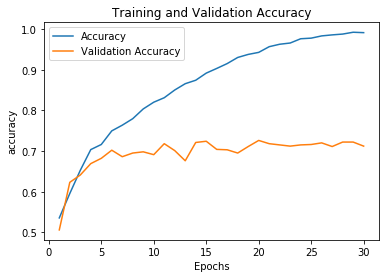

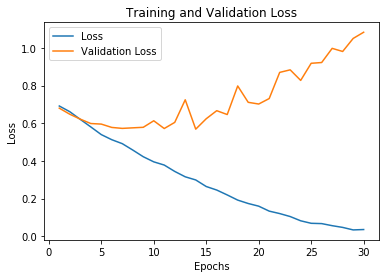

In [29]:
print_curves(history)

### Working on overfitting

Adding Data Augmentation

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
    


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


Add Dropout

In [33]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

Epoch 1/30
100/100 [==============================] - 14s 141ms/step - loss: 0.6953 - acc: 0.5060 - val_loss: 0.6844 - val_acc: 0.5080
Epoch 2/30
100/100 [==============================] - 12s 122ms/step - loss: 0.6858 - acc: 0.5410 - val_loss: 0.6689 - val_acc: 0.6030
Epoch 3/30
100/100 [==============================] - 12s 121ms/step - loss: 0.6769 - acc: 0.5635 - val_loss: 0.6567 - val_acc: 0.6190
Epoch 4/30
100/100 [==============================] - 12s 119ms/step - loss: 0.6701 - acc: 0.5750 - val_loss: 0.6513 - val_acc: 0.6510
Epoch 5/30
100/100 [==============================] - 12s 121ms/step - loss: 0.6610 - acc: 0.5935 - val_loss: 0.6258 - val_acc: 0.6440
Epoch 6/30
100/100 [==============================] - 12s 121ms/step - loss: 0.6539 - acc: 0.6115 - val_loss: 0.6144 - val_acc: 0.6810
Epoch 7/30
100/100 [==============================] - 12s 123ms/step - loss: 0.6402 - acc: 0.6330 - val_loss: 0.6469 - val_acc: 0.6040
Epoch 8/30
100/100 [==============================] - 1

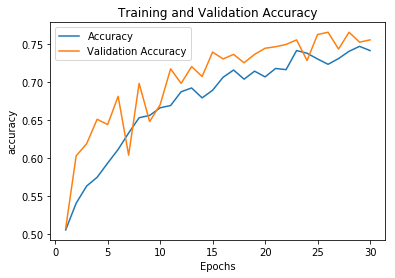

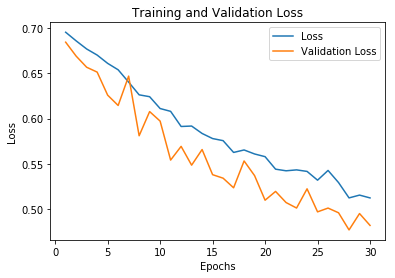

In [34]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50)

model.save('cats_and_dogs_small_2.h5')

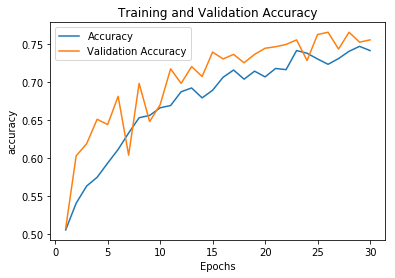

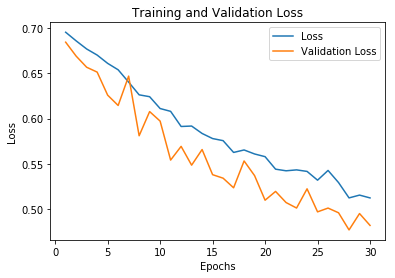

In [35]:
print_curves(history)

### Transfer Learning

In [17]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

58900480/58889256 [==============================] - 2s 0us/step


In [18]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

Extracting Features

In [19]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# base_dir, etc

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        
        # generator is infinite, so break after one round through
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)
            

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Reshape features

In [23]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [27]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(4*4*512,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

In [28]:
history = model.fit(train_features, train_labels,
         epochs=30,
         batch_size=20,
        
         validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 301us/step - loss: 0.6062 - acc: 0.6705 - val_loss: 0.4506 - val_acc: 0.8390
Epoch 2/30
2000/2000 [==============================] - 0s 245us/step - loss: 0.4226 - acc: 0.8110 - val_loss: 0.3665 - val_acc: 0.8680
Epoch 3/30
2000/2000 [==============================] - 0s 238us/step - loss: 0.3660 - acc: 0.8395 - val_loss: 0.3248 - val_acc: 0.8820
Epoch 4/30
2000/2000 [==============================] - 0s 242us/step - loss: 0.3195 - acc: 0.8695 - val_loss: 0.3068 - val_acc: 0.8740
Epoch 5/30
2000/2000 [==============================] - 0s 241us/step - loss: 0.2806 - acc: 0.8775 - val_loss: 0.2820 - val_acc: 0.9020
Epoch 6/30
2000/2000 [==============================] - 0s 244us/step - loss: 0.2624 - acc: 0.8930 - val_loss: 0.2734 - val_acc: 0.9000
Epoch 7/30
2000/2000 [==============================] - 0s 240us/step - loss: 0.2482 - acc: 0.9010 - val_loss: 0.2634 - val_acc: 0.9020


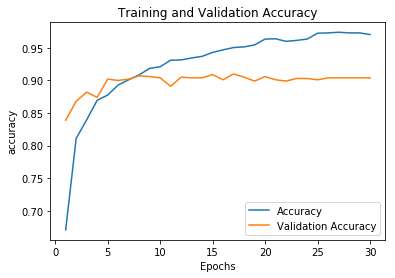

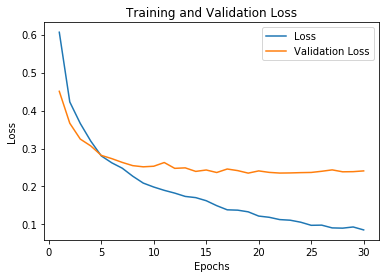

In [29]:
print_curves(history)

### Adding Data Augmentation to full VGG Base

In [71]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [73]:
print('number of Trainable weights before freezing:', len(model.trainable_weights))

('number of Trainable weights before freezing:', 4)


In [74]:
conv_base.trainable = False

In [75]:
# keep in mind these are the number of weight tensors, not number of total parameters
print('number of Trainable weights after freezing:', len(model.trainable_weights))

('number of Trainable weights after freezing:', 4)


In [76]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [77]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [78]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 13s 135ms/step - loss: 0.5992 - acc: 0.7015 - val_loss: 0.4566 - val_acc: 0.8440
Epoch 2/30
100/100 [==============================] - 13s 128ms/step - loss: 0.4951 - acc: 0.7810 - val_loss: 0.3706 - val_acc: 0.8720
Epoch 3/30
100/100 [==============================] - 13s 129ms/step - loss: 0.4443 - acc: 0.8065 - val_loss: 0.3286 - val_acc: 0.8810
Epoch 4/30
100/100 [==============================] - 14s 136ms/step - loss: 0.4206 - acc: 0.8095 - val_loss: 0.3180 - val_acc: 0.8730
Epoch 5/30
100/100 [==============================] - 13s 132ms/step - loss: 0.4019 - acc: 0.8180 - val_loss: 0.3010 - val_acc: 0.8710
Epoch 6/30
100/100 [==============================] - 13s 127ms/step - loss: 0.3895 - acc: 0.8300 - val_loss: 0.2800 - val_acc: 0.8900
Epoch 7/30
100/100 [==============================] - 13s 128ms/step - loss: 0.3677 - acc: 0.8325 - val_loss: 0.2924 - val_acc: 0.8770
Epoch 8/30
100/100 [==============================] - 1

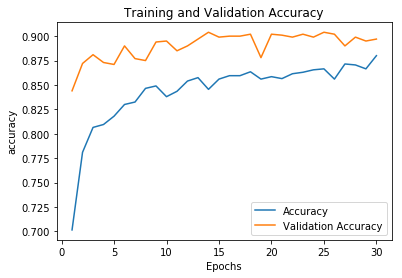

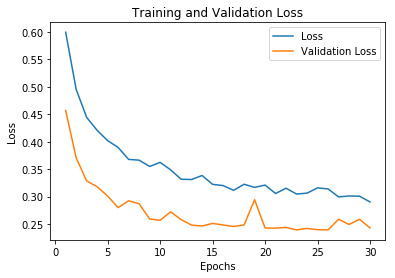

In [79]:
print_curves(history)

Try fine-tuning last CONV layer

In [80]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False

In [81]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])

In [82]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 15s 148ms/step - loss: 0.2958 - acc: 0.8745 - val_loss: 0.3571 - val_acc: 0.8860
Epoch 2/100
100/100 [==============================] - 14s 140ms/step - loss: 0.2250 - acc: 0.9070 - val_loss: 0.1515 - val_acc: 0.9380
Epoch 3/100
100/100 [==============================] - 14s 141ms/step - loss: 0.1857 - acc: 0.9235 - val_loss: 0.1477 - val_acc: 0.9450
Epoch 4/100
100/100 [==============================] - 14s 140ms/step - loss: 0.1524 - acc: 0.9385 - val_loss: 0.1372 - val_acc: 0.9500
Epoch 5/100
100/100 [==============================] - 14s 140ms/step - loss: 0.1286 - acc: 0.9510 - val_loss: 0.1134 - val_acc: 0.9500
Epoch 6/100
100/100 [==============================] - 14s 140ms/step - loss: 0.1326 - acc: 0.9475 - val_loss: 0.1357 - val_acc: 0.9490
Epoch 7/100
100/100 [==============================] - 14s 138ms/step - loss: 0.0999 - acc: 0.9575 - val_loss: 0.0943 - val_acc: 0.9640
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 14s 140ms/step - loss: 0.0111 - acc: 0.9975 - val_loss: 0.1660 - val_acc: 0.9710
Epoch 62/100
100/100 [==============================] - 14s 138ms/step - loss: 0.0180 - acc: 0.9945 - val_loss: 0.1362 - val_acc: 0.9780
Epoch 63/100
100/100 [==============================] - 14s 138ms/step - loss: 0.0172 - acc: 0.9930 - val_loss: 0.1380 - val_acc: 0.9800
Epoch 64/100
100/100 [==============================] - 14s 142ms/step - loss: 0.0177 - acc: 0.9975 - val_loss: 0.1823 - val_acc: 0.9720
Epoch 65/100
100/100 [==============================] - 14s 139ms/step - loss: 0.0106 - acc: 0.9960 - val_loss: 0.1840 - val_acc: 0.9700
Epoch 66/100
100/100 [==============================] - 14s 139ms/step - loss: 0.0163 - acc: 0.9940 - val_loss: 0.1490 - val_acc: 0.9750
Epoch 67/100
100/100 [==============================] - 14s 139ms/step - loss: 0.0129 - acc: 0.9945 - val_loss: 0.1293 - val_acc: 0.9770
Epoch 68/100
100/100 [===================

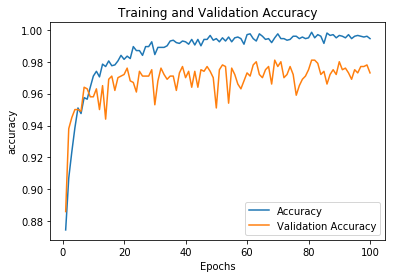

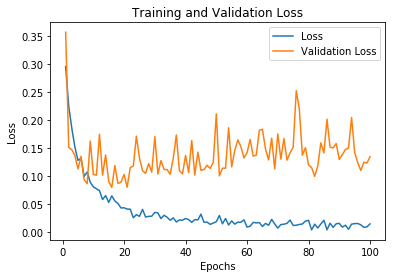

In [83]:
print_curves(history)

In [86]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print(test_loss)
print(test_acc)

Found 1000 images belonging to 2 classes.
0.22514030671
0.964999992847
